# Verify the Central Limit Theorem

In [117]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

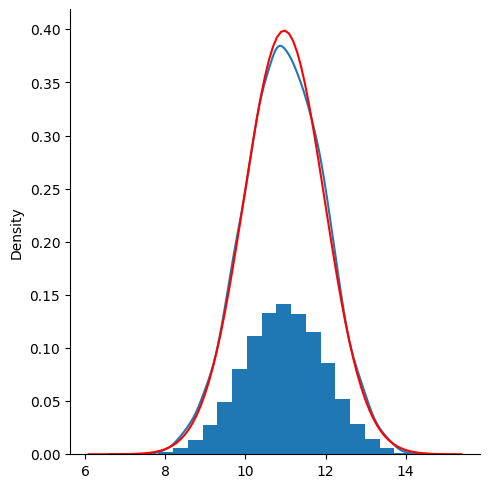

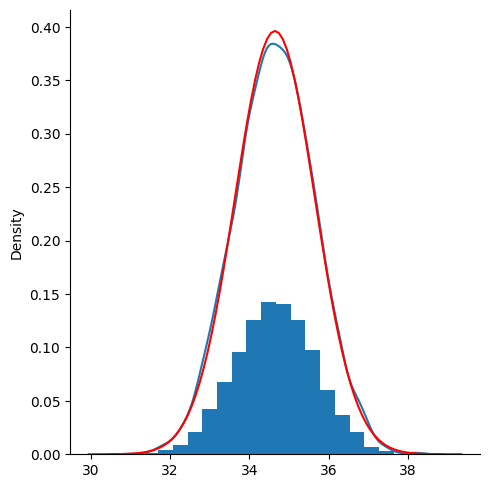

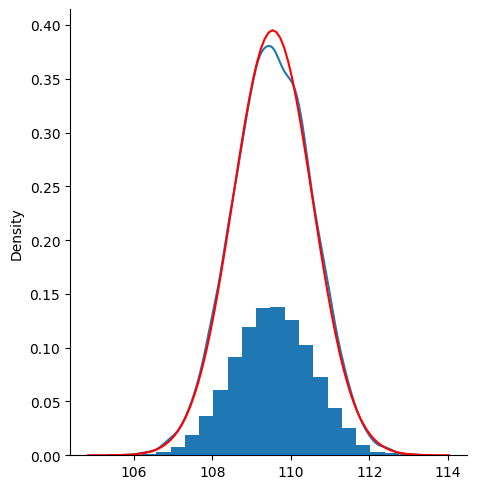

In [171]:
def generate_normal(s:np.ndarray):
    """Generate the normal dist.
    for a given sum of uniform dists.
    """
    mean = s.mean()
    std  = s.std()
    
    x = np.arange(min(s)-std,max(s)+std, 0.1)

    return np.array([x,(1 / (std * np.sqrt(2 * np.pi))) * \
            np.exp(- ((x - mean) * (x - mean) / (2 * std * std)))])

def generate_zn(k: int , N: int, a:float = 0, b:float = 1):
    """
    generate Zn where n -> N
    """
    mean = (a-b)/2
    std  = np.sqrt((a-b)*(a-b)/12)

    s = np.array([
        np.sum((np.random.uniform(0,1,N) - mean) / (std * np.sqrt(N))) 
        for _ in range(k)
        ])
    return s


for N in [10,100,1000]:
    s = generate_zn(10**4, N)
    norm = generate_normal(s)
    counts, bins = np.histogram(s,bins=20)
    counts = [count / sum(counts) for count in counts]
    sns.displot(s, kind='kde')
    plt.hist(bins[:-1], bins, weights=counts)
    sns.lineplot(x=norm.T[:,0], y=norm.T[:,1],color='red')
    # plt.title(f'Z{N} vs Normal Distribution')
    # plt.legend(labels=[f'Emperical Z{N}','Normal Distribution'])